In [4]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


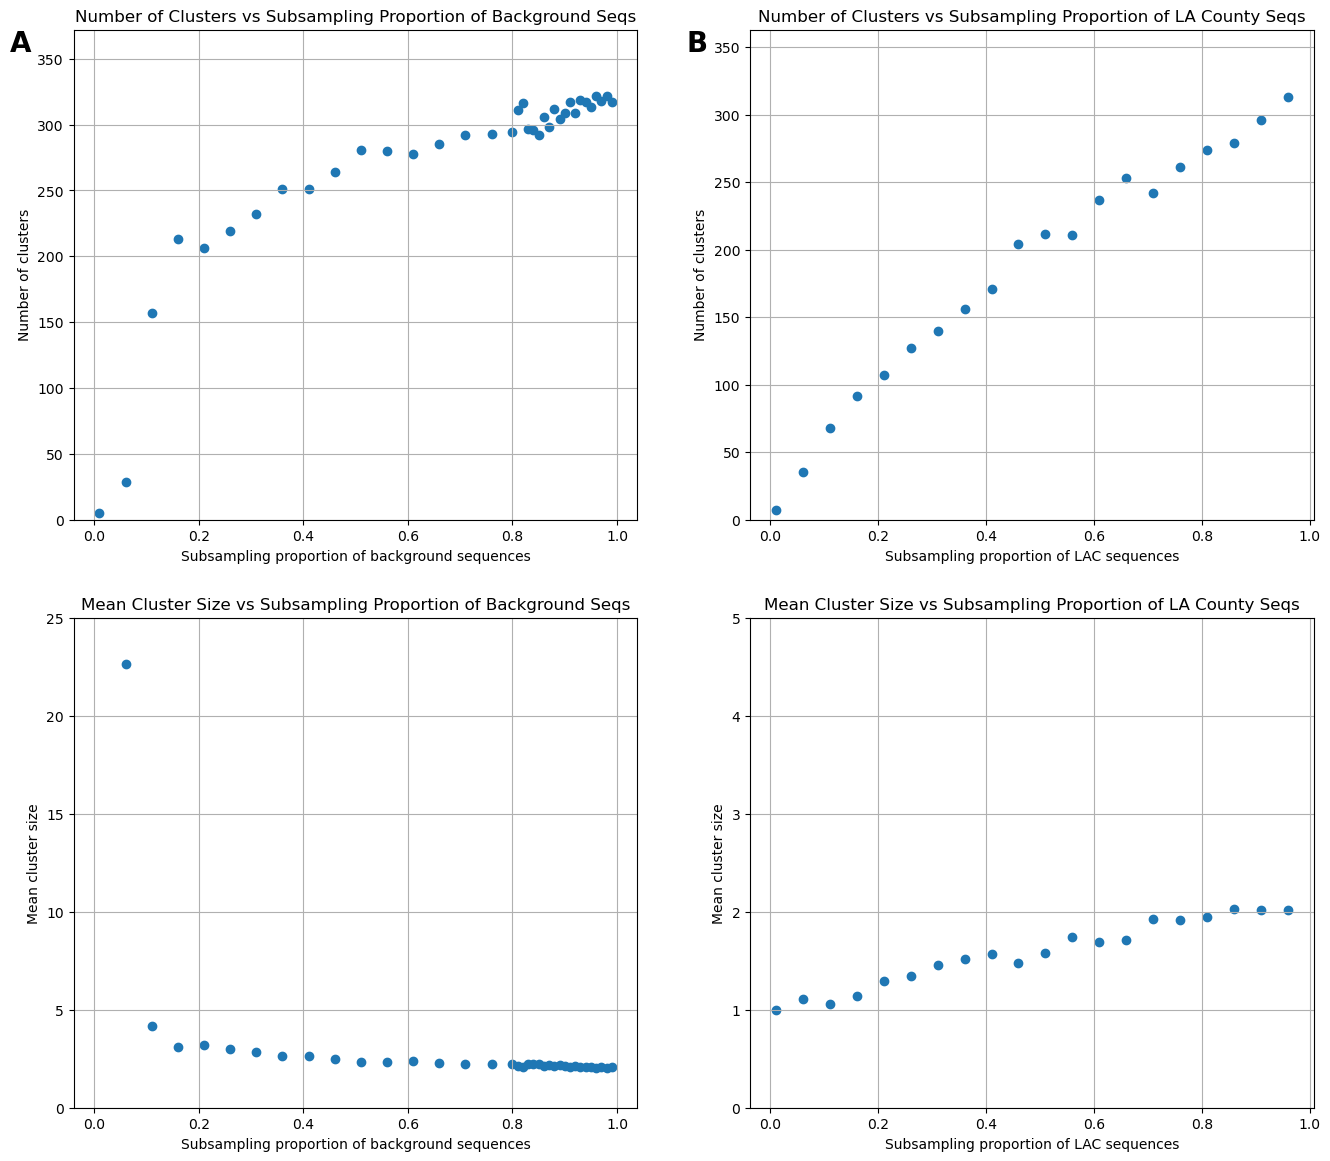

In [19]:
## script for analyzing subsampling results

fig = plt.figure(figsize=(16,14),facecolor='w')
gs = GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1], hspace=0.2)  

# path = "~/Desktop/gitrepos/mpox_la/mpox_build/cluster_assignment/"
# results_path = os.path.join(os.path.expanduser(path), "results")

# Get the list of files matching the pattern 'cluster_assignment*.tsv'
list_files = glob.glob(os.path.join("../mpox_build/cluster_assignment/results/", "cluster_assignment*.tsv"))

dat = pd.DataFrame()

# Loop through the files
for file in list_files:
    df = pd.read_csv(file, sep="\t")  # Read the file into a DataFrame
    
    tmp = os.path.basename(file).split("_")  # Split filename based on "_"
    val = tmp[-1].replace("assignment", "100").replace(".tsv", "")
    uni_clusters = df['cluster'].unique()  # Get unique clusters
    cluster_size = [sum(df['cluster'] == cluster) for cluster in uni_clusters]  # Get the size of each cluster
    
    dat = pd.concat([dat, pd.DataFrame({
        'sub': [float(val)/100],
        'nr': [len(uni_clusters)],
        'm': [np.mean(cluster_size)],
        'u': [np.quantile(cluster_size, 0.975)],
        'median': [np.median(cluster_size)]
    })], ignore_index=True)


# Add the first subplot 
ax1 = fig.add_subplot(gs[0, 0])


# Plot number of clusters vs subsampling proportion
ax1.scatter(dat['sub'], dat['nr'])
ax1.set_ylim(0, dat['nr'].max()+50)
ax1.set_xlabel("Subsampling proportion of background sequences")
ax1.set_ylabel("Number of clusters")
ax1.set_title("Number of Clusters vs Subsampling Proportion of Background Seqs")
ax1.grid(True)

ax1.text(-0.075, 1, "A", transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  


# Add the second subplot
ax2 = fig.add_subplot(gs[1, 0])

# Plot mean cluster size vs subsampling proportion
ax2.scatter(dat['sub'], dat['m'])
ax2.set_ylim(0, 25)
ax2.set_xlabel("Subsampling proportion of background sequences")
ax2.set_ylabel("Mean cluster size")
ax2.set_title("Mean Cluster Size vs Subsampling Proportion of Background Seqs")
ax2.grid(True)

### now do the same for the subsampling the seqs within LAC

# Get the list of files matching the pattern 'cluster_assignment*.tsv'
list_files = glob.glob(os.path.join("../mpox_build/cluster_assignment/results/inside/", "cluster_assignment_within*.tsv"))

dat = pd.DataFrame()

# Loop through the files
for file in list_files:
    df = pd.read_csv(file, sep="\t")  # Read the file into a DataFrame
    
    tmp = os.path.basename(file).split("_")  # Split filename based on "_"
    val = tmp[-1].replace("assignment_within_LA_subsampling", "100").replace(".tsv", "")
    uni_clusters = df['cluster'].unique()  # Get unique clusters
    cluster_size = [sum(df['cluster'] == cluster) for cluster in uni_clusters]  # Get the size of each cluster
    
    dat = pd.concat([dat, pd.DataFrame({
        'sub': [float(val)/100],
        'nr': [len(uni_clusters)],
        'm': [np.mean(cluster_size)],
        'u': [np.quantile(cluster_size, 0.975)],
        'median': [np.median(cluster_size)]
    })], ignore_index=True)


ax3 = fig.add_subplot(gs[0, 1])

# Plot number of clusters vs subsampling proportion
ax3.scatter(dat['sub'], dat['nr'])
ax3.set_ylim(0, dat['nr'].max()+50)
ax3.set_xlabel("Subsampling proportion of LAC sequences")
ax3.set_ylabel("Number of clusters")
ax3.set_title("Number of Clusters vs Subsampling Proportion of LA County Seqs")
ax3.grid(True)

ax3.text(-0.075, 1, "B", transform=ax3.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  


ax4 = fig.add_subplot(gs[1, 1])
# Plot mean cluster size vs subsampling proportion
ax4.scatter(dat['sub'], dat['m'])
ax4.set_ylim(0, 5)
ax4.set_xlabel("Subsampling proportion of LAC sequences")
ax4.set_ylabel("Mean cluster size")
ax4.set_title("Mean Cluster Size vs Subsampling Proportion of LA County Seqs")
ax4.grid(True)
plt.savefig("../figures/subsampling_cluster_fig.png", dpi = 300, bbox_inches='tight')
plt.show()



